# Predicting Newsletter Subscription Using Age and Hours Played

## Introduction

<p>We will be addressing question 1:</p><p><em>What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?</em></p>

To explore this, our question is:
<strong>Can age and hours played predict if a player will subscribe to a game newsletter?</strong></em><p>

This question will be answered using the players.csv dataset, which is composed of user input and system information from the PLAICraft server, collected by a UBC Computer Science research group led by Frank Wood. The dataset contains information about the players, which includes personal details such as their name, email, gender and age, alongside their experience levels, hours played and whether they are subscribed to the newsletter or not.


`players.csv`consists of user data with 196 observations and 7 variables:

|<strong>Variable         | Data Type | Variable Definition</strong>                       |
|:------------------------|:----------|:---------------------------------------------------|
| `experience`            | chr       | Player's experience level                          |
| `subscribe`             | lgl       | If player has subscribed to the game newsletter    |
| `hashedEmail`           | chr       | Player's unique hashed email                       |
| `played_hours`          | dbl       | Hours  player has played on the PLAICraft server   |
| `name`                  | chr       | Player's name                                      |
| `gender`                | chr       | Player's gender                                    |
| `Age`                   | dbl       | Player's age                                       |




## Methods & Results

In [3]:
# Run cell to import all libraries
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



#### Loading and Wrangling the Dataset

In [7]:
# Loading in the data
players_raw <- read_csv("https://raw.githubusercontent.com/echen504/dsci-100-25w2-grp29/refs/heads/main/players.csv")

# Wrangling the dataset that will be used in this project
players <- players_raw |>
    select(subscribe, played_hours, Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscriber" = "TRUE", "Non-Subscriber" = "FALSE")) 

head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
Subscriber,30.3,9
Subscriber,3.8,17
Non-Subscriber,0.0,17
Subscriber,0.7,21
Subscriber,0.1,21
Subscriber,0.0,17


#### Summary Statistics of the Dataset

In [8]:
players_max <- players |>
    select(played_hours, Age) |>
    map_df(max, na.rm = TRUE)

players_min <- players |>
    select(played_hours, Age) |>
    map_df(min, na.rm = TRUE)

players_avg <- players |>
    select(played_hours, Age) |>
    map_df(mean, na.rm = TRUE)

players_median <- players |>
    select(played_hours, Age) |>
    map_df(median, na.rm = TRUE)

|Summary Statistic| Hours Played | Age    |
|:---------------:|:------------:|:------:|
|Max              |223.1         |50      |
|Min              |0             |8       |
|Mean             |5.845918      |20.52062|
|Median           |0.1           |19      |

#### Visualizing the Exploratory Data

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


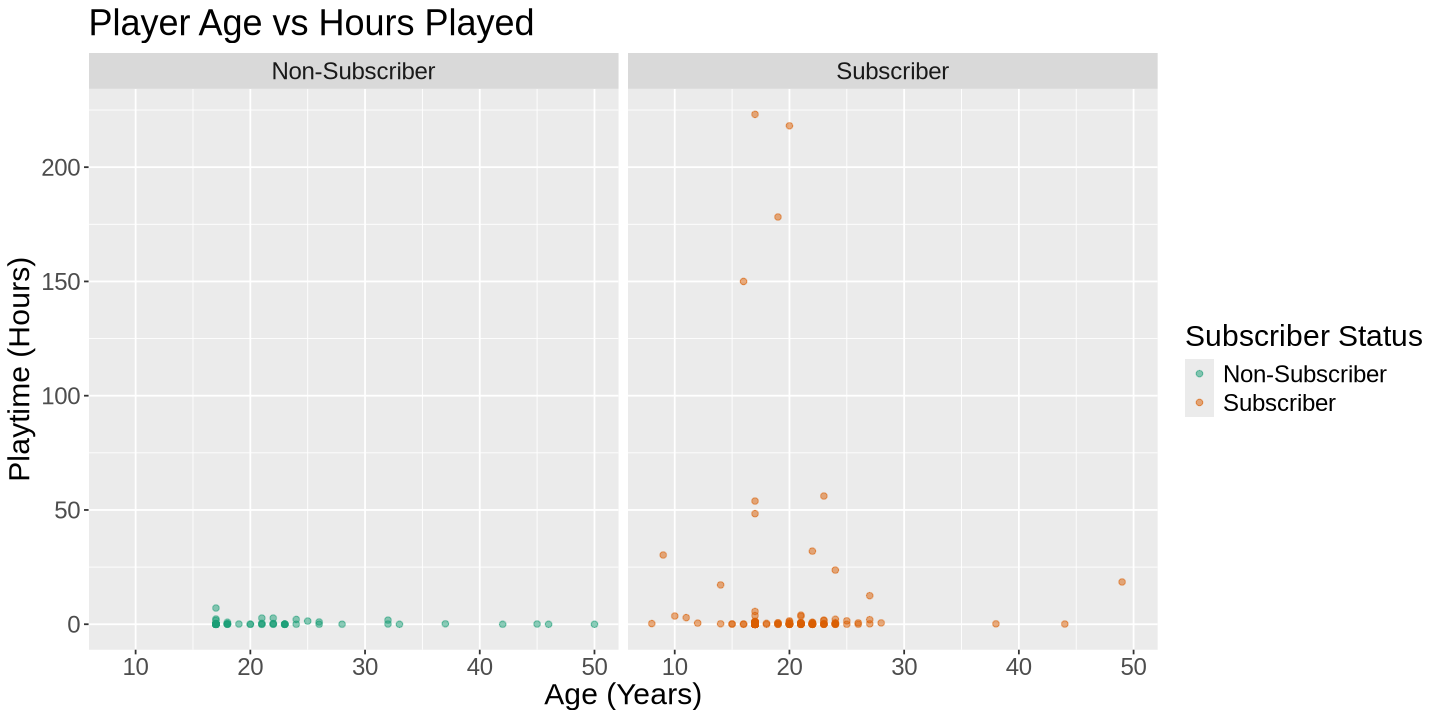

In [10]:
options(repr.plot.height = 6, repr.plot.width = 12)

# Visualizing player age vs. hours played in a scatterplot
players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (Years)",
         y = "Playtime (Hours)",
         title = "Player Age vs Hours Played",
         color = "Subscriber Status") +
    theme(text = element_text(size = 18)) +
    scale_color_brewer(palette = "Dark2") +
    facet_grid(cols = vars(subscribe))
players_plot

Figure 1: Scatterplot of player age vs hours played, separated by subscriber class. 

### Data Analysis

We will be using a <strong>K-nearest neighbours classification</strong> to predict the `subscribe` class using predictor variables `Age` and `played_hours`.